# Matplolib 의 여러가지 플롯

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# minus 표시 
# 한글 쓸때 필수다
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

## 1. 바차트 

### x 데이터가 카테고리 값인경우

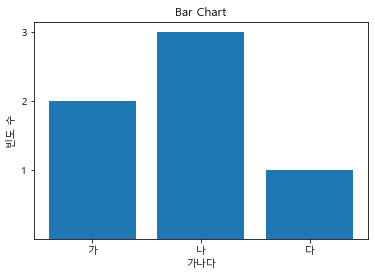

In [2]:
y = [2, 3, 1]
x = np.arange(len(y))
xlabel = ['가', '나', '다'] 
plt.title("Bar Chart")
plt.bar(x, y) ## bar
plt.xticks(x, xlabel)#3개 []
plt.yticks(sorted(y))
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()

### y 데이터가 카테고리 값인경우

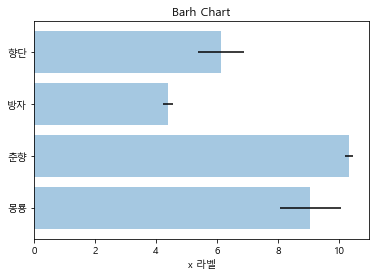

In [12]:
np.random.seed(2021)

people = ['몽룡', '춘향', '방자', '향단']
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.title("Barh Chart")
plt.barh(y_pos, performance, xerr=error, alpha=0.4) ##가로 bar alph는 투명율, 
#xerr은 오차율 - 차트에 작대기
plt.yticks(y_pos, people)
plt.xlabel('x 라벨')
plt.show()

#### 타이타닉 선실변 승객수

In [15]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [32]:
s = titanic['class'].value_counts()
s

Third     491
First     216
Second    184
Name: class, dtype: int64

In [33]:
df =titanic[['class', 'pclass']].groupby('class').count()
df

,pclass
class,
First,216
Second,184
Third,491


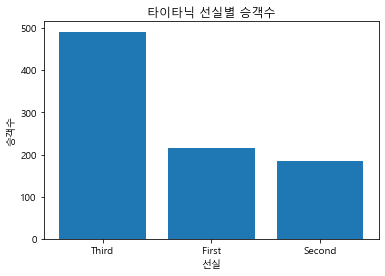

In [31]:
y = s.values
x = np.arange(len(y))
xlabel = s.index.to_list()

plt.title('타이타닉 선실별 승객수')
plt.bar(x,y)
plt.xticks(x,xlabel)
plt.xlabel('선실')
plt.ylabel('승객수')
plt.show()

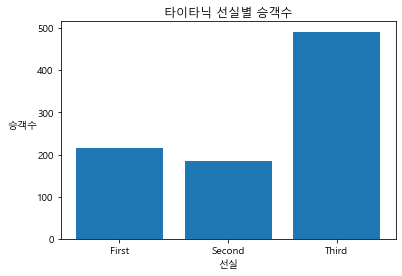

In [40]:
y = df.pclass.values
x = np.arange(len(y))
xlabel = df.index.to_list()

plt.title('타이타닉 선실별 승객수')
plt.bar(x,y)
plt.xticks(x,xlabel)
plt.xlabel('선실')
plt.ylabel('승객수', rotation=0, labelpad=15) #rotation ylabel 가로로 
#lablepad는 표랑 공백ㄴ
plt.show()

## 2.파이차트

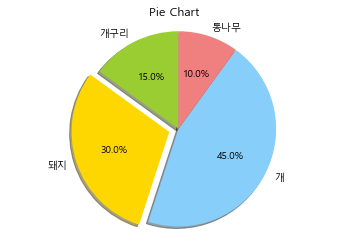

In [49]:
labels = ['개구리', '돼지', '개', '통나무']
sizes = [15, 30, 45, 10] # 100분율로
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'] #색
explode = (0, 0.1, 0, 0) ## 돼지강조
plt.title("Pie Chart")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, #색갈 지정
        autopct='%1.1f%%', shadow=True, startangle=90) #%로 표시, 그림자, 시작 각
plt.axis('equal')
plt.show()

## 3. 히스토그램
> 데이터의 분포 확인

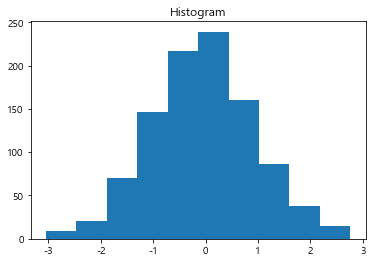

In [63]:
np.random.seed(0)
x = np.random.randn(1000) #표준정규분포
plt.title("Histogram")
arrays, bins, patches = plt.hist(x, bins=10) #히스토그램으로 그린다(10등분으로)
plt.show()

In [64]:
arrays, bins, patches #각 x축별 y 개수 / 10등분한것의 x값 / patches는 찾아볼것

(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
        -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
         2.75935511]),
 <BarContainer object of 10 artists>)

## 4. 산정도(Scatter Plot)
> 두 개의 실수 데이터 집합의 상관관계

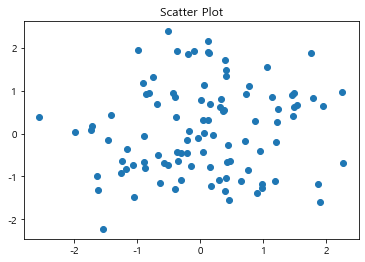

In [65]:
np.random.seed(0)
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.title("Scatter Plot")
plt.scatter(X, Y) #산정도
plt.show()

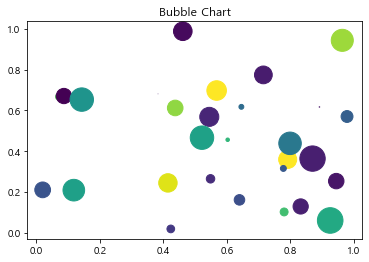

In [66]:
#2차원이 아니라 3차원 혹은 4차원인 경우에는 점 하나의 크기 혹은 색깔을 이용하여 
# 다른 데이터 값을 나타낼 수도 있다.
N = 30
np.random.seed(0)
x = np.random.rand(N)
y1 = np.random.rand(N)
y2 = np.random.rand(N)
y3 = np.pi * (15 * np.random.rand(N))**2
plt.title("Bubble Chart")
plt.scatter(x, y1, c=y2, s=y3)
plt.show()

### Anscombe's Quartet(앤스컴 콰르텟)
- 선형 회귀선 : y = 3.0 + 0.5 * x

In [68]:
import seaborn as sns
ans = sns.load_dataset('anscombe')
ans.shape

(44, 3)

In [70]:
ans.head(2)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95


In [71]:
ans.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

#### Dataset 에 대하여 산정도와 회귀선그리기

In [72]:
ds1 = ans[ans.dataset == 'I']
ds1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


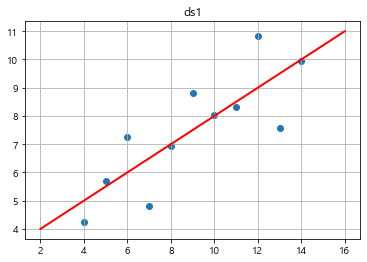

In [75]:
#- 선형 회귀선 : y = 3.0 + 0.5 * x
plt.scatter(ds1.x, ds1.y)
plt.grid()
plt.plot([2,16], [4,11], c='r', lw=2) #색 줄넒이
plt.title('ds1')
plt.show()

#### 4개의 데이터셋 모두에 대한 그림

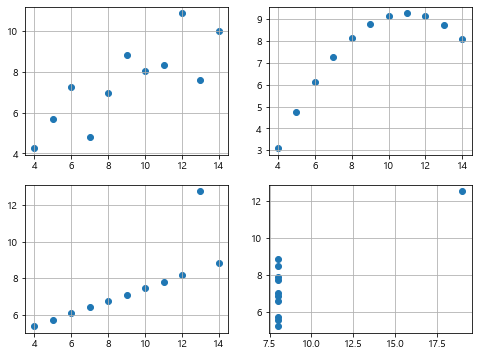

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(8,6))

for i, roman in enumerate(['I', 'II', 'III', 'IV']):
    ds = ans[ans.dataset == roman]
    ax = axes[i//2, i%2]
    ax.scatter(ds.x, ds.y)
    ax.grid()

plt.show()

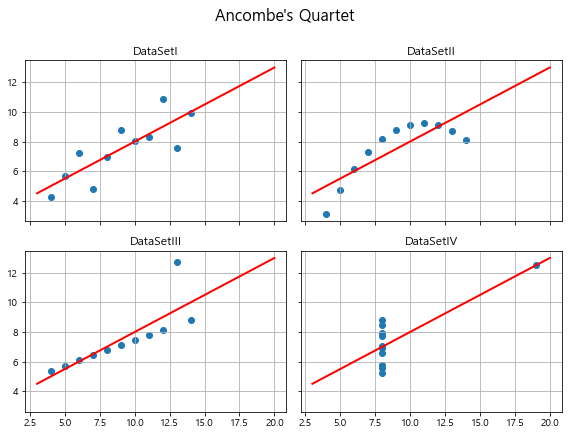

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(8,6),
                                sharex=True , sharey=True) #각 axes마다 x,y 같다

for i, roman in enumerate(['I', 'II', 'III', 'IV']):
    ds = ans[ans.dataset == roman]
    ax = axes[i//2, i%2]
    ax.scatter(ds.x, ds.y)
    ax.plot([3,20], [4.5,13], 'r-', lw=2) # y = 0.5 * x + 3
    ax.set_title(f'DataSet{roman}')
    ax.grid()

fig.suptitle("Ancombe's Quartet", fontsize=16, y=1) #y는 위치
plt.tight_layout()
plt.show()

## 5. imshow
> 2차원 이미지 데이터

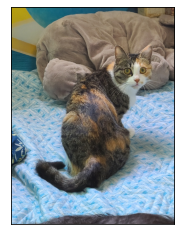

In [90]:
import matplotlib.image as img #이미지 볼려면 
image = img.imread('cat.jpg')
plt.imshow(image)
plt.xticks([]); plt.yticks([])
plt.show()

In [87]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images[0]
X

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

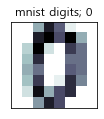

In [88]:
plt.title("mnist digits; 0")
plt.imshow(X, interpolation='nearest', cmap=plt.cm.bone_r)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplots_adjust(left=0.35, right=0.65, bottom=0.35, top=0.65)
plt.show()

## 6.Box plot

In [93]:
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


#### setosa 풍종의 각 feature 의 박스 플롯

In [ ]:
setosa = iris[iris.species == 'setosa']
plt.figure(figsize=(8,10))
plt.boxplot([setosa.sepal_length, setosa.sepal_width
            ,setosa.petal_length, setosa.petal_width],
            labels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width]'])
plt.title('setosa 풍종의 각 feature별  박스 플롯')
plt.grid()
plt.show()

In [104]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

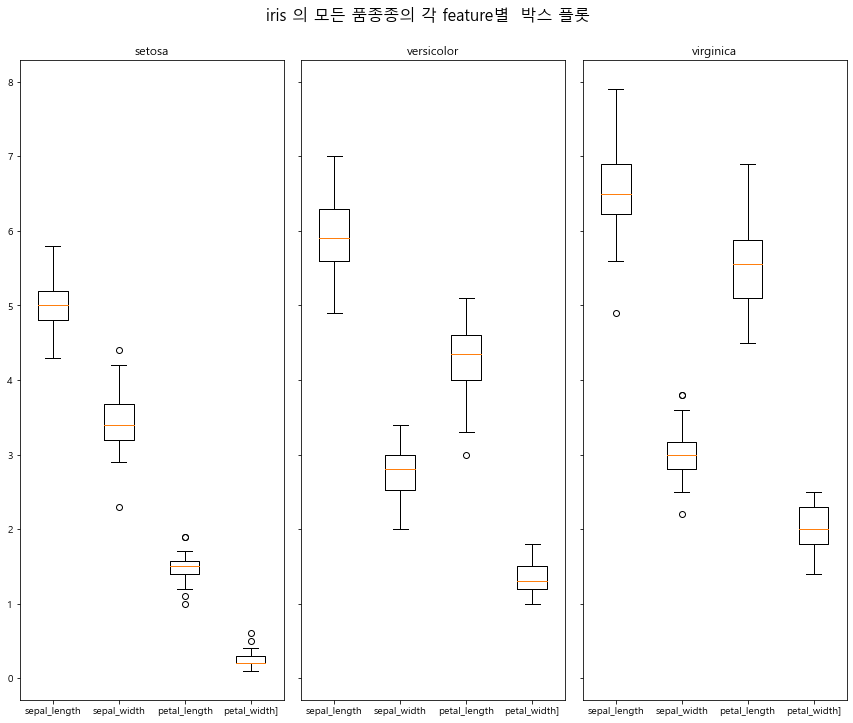

In [128]:
fig, axes = plt.subplots(1, 3, figsize=(12,10), sharey=True) #각 axes마다 y 같다

l=['sepal_length', 'sepal_width', 'petal_length', 'petal_width]']
for i, fw in enumerate(['setosa', 'versicolor', 'virginica']):
    ds = iris[iris.species == fw]
    ax = axes[i]
    ax.boxplot([ds.sepal_length, ds.sepal_width
                ,ds.petal_length, ds.petal_width],labels=l)
    ax.set_title(f'{fw}')

fig.suptitle("iris 의 모든 품종종의 각 feature별  박스 플롯", fontsize=16, y=1) #y는 위치
plt.tight_layout()
plt.show()